## MINERAL

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

def cargar_nc(archivo):
    """
    Carga un archivo .nc y retorna el dataset
    """
    ds = xr.open_dataset(archivo)
    return ds

def visualizar_mineral(ds, mineral):
    """
    Visualiza la abundancia espectral de un mineral específico del dataset
    """
    data = ds[mineral]
    data.plot()
    plt.title(f'Abundancia espectral de {mineral}')
    plt.show()

if __name__ == "__main__":
    archivo = "EMIT_L2B_MIN_001_20231005T044208_2327803_023.nc"
    
    # Cargamos el dataset
    ds = cargar_nc(archivo)
    
    # Lista de minerales que deseas visualizar
    print(ds)


<xarray.Dataset>
Dimensions:             (downtrack: 1280, crosstrack: 1242)
Dimensions without coordinates: downtrack, crosstrack
Data variables:
    group_1_band_depth  (downtrack, crosstrack) float32 ...
    group_1_mineral_id  (downtrack, crosstrack) float32 ...
    group_2_band_depth  (downtrack, crosstrack) float32 ...
    group_2_mineral_id  (downtrack, crosstrack) float32 ...
Attributes: (12/37)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             42.69343819330785
    spatialResolution:                 0.000542232520256367
    spatial_ref:            

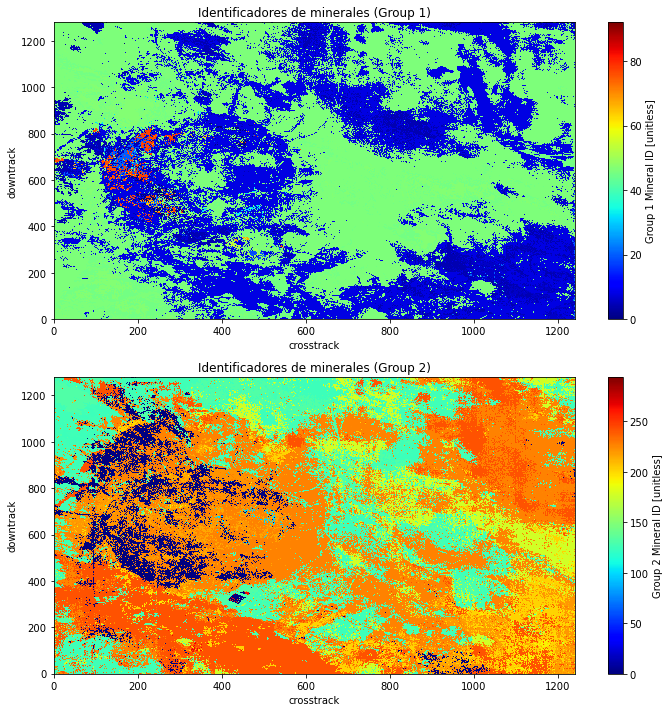

In [9]:
import matplotlib.pyplot as plt

def visualizar_identificadores(ds):
    fig, axarr = plt.subplots(2, 1, figsize=(10, 10))
    
    # Visualiza los identificadores para group_1
    ds["group_1_mineral_id"].plot(ax=axarr[0], cmap='jet')
    axarr[0].set_title('Identificadores de minerales (Group 1)')
    
    # Visualiza los identificadores para group_2
    ds["group_2_mineral_id"].plot(ax=axarr[1], cmap='jet')
    axarr[1].set_title('Identificadores de minerales (Group 2)')
    
    plt.tight_layout()
    plt.show()

visualizar_identificadores(ds)


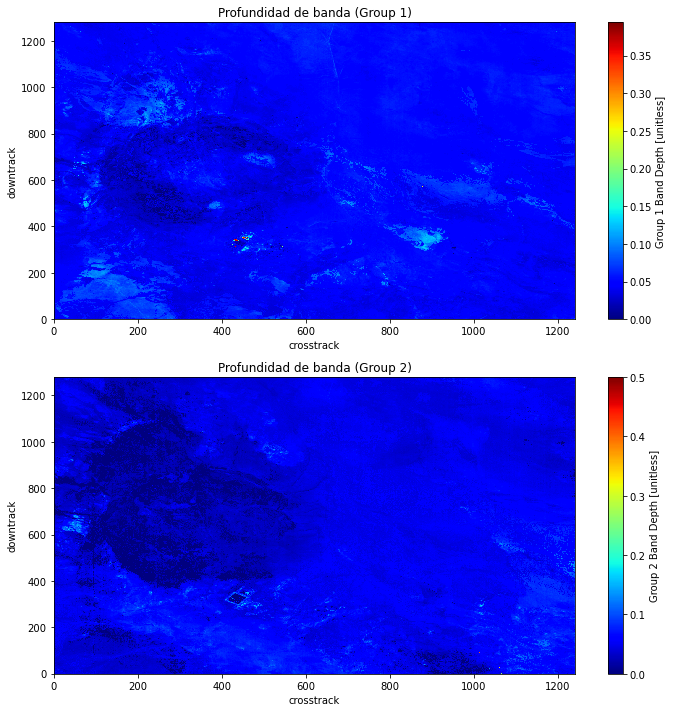

In [10]:
def visualizar_profundidad_banda(ds):
    fig, axarr = plt.subplots(2, 1, figsize=(10, 10))
    
    # Visualiza la profundidad de banda para group_1
    ds["group_1_band_depth"].plot(ax=axarr[0], cmap='jet')
    axarr[0].set_title('Profundidad de banda (Group 1)')
    
    # Visualiza la profundidad de banda para group_2
    ds["group_2_band_depth"].plot(ax=axarr[1], cmap='jet')
    axarr[1].set_title('Profundidad de banda (Group 2)')
    
    plt.tight_layout()
    plt.show()

visualizar_profundidad_banda(ds)


In [11]:
def mostrar_estadisticas_basicas(ds, variable):
    print(f"Estadísticas para {variable}:")
    print("------------------------------")
    print("Mínimo:", ds[variable].min().values)
    print("Máximo:", ds[variable].max().values)
    print("Media:", ds[variable].mean().values)
    print("Desviación Estándar:", ds[variable].std().values)
    print()

def mostrar_muestra_datos(ds, variable):
    print(f"Muestra de datos para {variable}:")
    print("-------------------------------")
    print(ds[variable][:10, :10].values)  # Mostramos una submuestra de 10x10
    print()

variables = ["group_1_band_depth", "group_1_mineral_id", "group_2_band_depth", "group_2_mineral_id"]

for variable in variables:
    mostrar_estadisticas_basicas(ds, variable)
    mostrar_muestra_datos(ds, variable)

Estadísticas para group_1_band_depth:
------------------------------
Mínimo: 0.0
Máximo: 0.39411765336990356
Media: 0.04644731
Desviación Estándar: 0.013089786283671856

Muestra de datos para group_1_band_depth:
-------------------------------
[[0.03921569 0.04705882 0.04509804 0.04313726 0.03921569 0.04117647
  0.04117647 0.04117647 0.03921569 0.03921569]
 [0.03333334 0.04509804 0.04509804 0.04313726 0.03921569 0.04117647
  0.03921569 0.03921569 0.04117647 0.04117647]
 [0.04117647 0.04901961 0.04705882 0.04509804 0.04313726 0.04117647
  0.03921569 0.04117647 0.04117647 0.04117647]
 [0.04705882 0.05686275 0.05490196 0.04901961 0.04509804 0.04313726
  0.04117647 0.04117647 0.03921569 0.0372549 ]
 [0.04901961 0.05686275 0.05490196 0.05490196 0.05098039 0.04705882
  0.04313726 0.04313726 0.03921569 0.04117647]
 [0.04705882 0.05294118 0.05294118 0.05490196 0.05098039 0.05098039
  0.04509804 0.04509804 0.04313726 0.04509804]
 [0.04509804 0.05294118 0.05294118 0.05294118 0.04901961 0.0490196

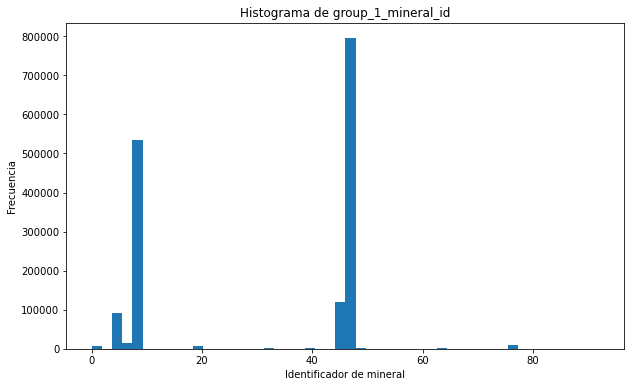

In [12]:
def mostrar_histograma_minerales(ds, variable):
    ds[variable].plot.hist(bins=50, figsize=(10, 6))
    plt.title(f'Histograma de {variable}')
    plt.xlabel('Identificador de mineral')
    plt.ylabel('Frecuencia')
    plt.show()

# Ejemplo para group_1_mineral_id
mostrar_histograma_minerales(ds, "group_1_mineral_id")


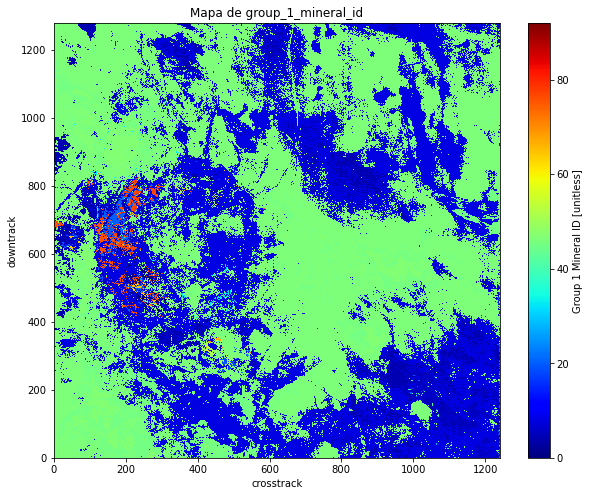

In [13]:
def mostrar_mapa_identificadores(ds, variable):
    ds[variable].plot(figsize=(10, 8), cmap='jet')
    plt.title(f'Mapa de {variable}')
    plt.show()

# Ejemplo para group_1_mineral_id
mostrar_mapa_identificadores(ds, "group_1_mineral_id")


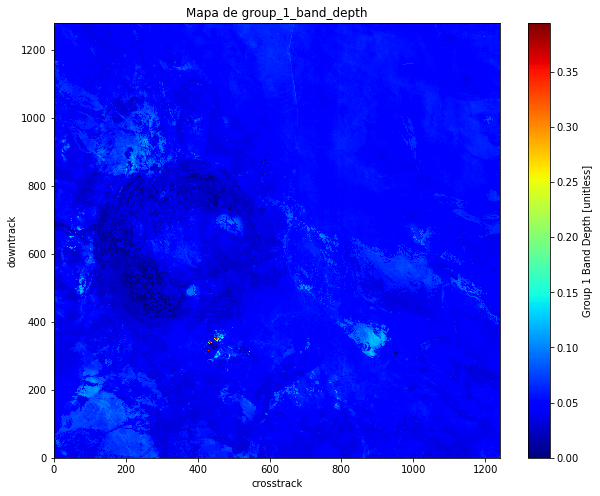

In [15]:
def mostrar_mapa_profundidad_banda(ds, variable):
    ds[variable].plot(figsize=(10, 8), cmap='jet')
    plt.title(f'Mapa de {variable}')
    plt.show()

# Ejemplo para group_1_band_depth
mostrar_mapa_profundidad_banda(ds, "group_1_band_depth")